In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from matplotlib import rcParamsDefault

In [2]:
etot_kpoint_file = "etot-vs-kpoint.dat"
etot_ecuwfc_file = "etot-vs-ecutwfc.dat"
etot_ecutrho_file = "etot-vs-ecutrho.dat"

In [3]:
etot_kpoint_df = pd.read_csv(etot_kpoint_file, delimiter=' ', names=["# kpoints", "etot"])
etot_ecuwfc_df = pd.read_csv(etot_ecuwfc_file, delimiter=' ', names=["ecutwfc", "etot"])
etot_ecutrho_df = pd.read_csv(etot_ecutrho_file, delimiter=' ', names=["ecutrho", "etot"])

In [4]:
display(etot_ecutrho_df.head())
print(etot_ecutrho_df.shape)

,ecutrho,etot
0,60,-353.174797
1,75,-353.136840
2,90,-353.035120
3,105,-352.945081
4,120,-352.843160


(13, 2)


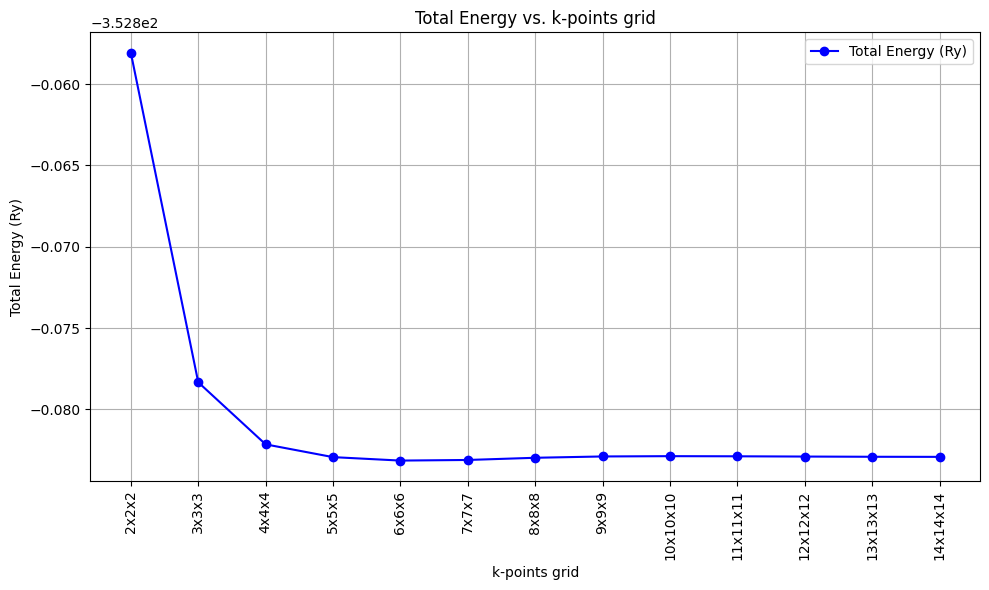

In [5]:
kpoints = etot_kpoint_df["# kpoints"]
kpoints_grid = []
for i in kpoints:
    kpoints_grid.append(rf"{i}x{i}x{i}")
total_energy = etot_kpoint_df["etot"]

plt.figure(figsize=(10, 6))
plt.plot(kpoints, total_energy, marker='o', linestyle='-', color='b', label='Total Energy (Ry)')
plt.xticks(ticks=kpoints, labels=kpoints_grid, rotation=90)
plt.title('Total Energy vs. k-points grid')
plt.xlabel('k-points grid')
plt.ylabel('Total Energy (Ry)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("etot_kpoint.png", dpi=600)
plt.show()

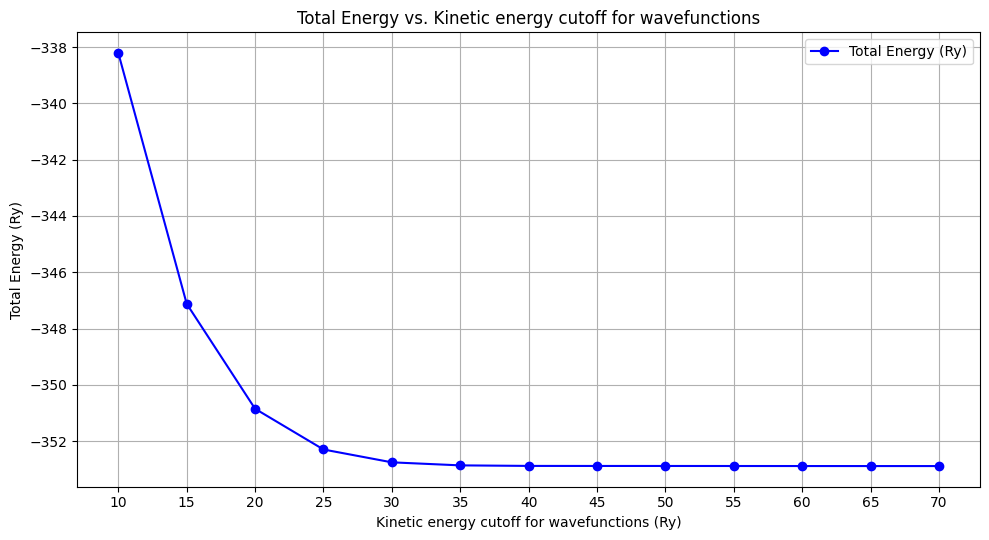

In [6]:
ecutwfc = etot_ecuwfc_df["ecutwfc"]
total_energy = etot_ecuwfc_df["etot"]

plt.figure(figsize=(10, 5.5))
plt.plot(ecutwfc, total_energy, marker='o', linestyle='-', color='b', label='Total Energy (Ry)')
plt.xticks(ecutwfc)
plt.title('Total Energy vs. Kinetic energy cutoff for wavefunctions')
plt.xlabel('Kinetic energy cutoff for wavefunctions (Ry)')
plt.ylabel('Total Energy (Ry)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("etot_ecuwfc.png", dpi=600)
plt.show()

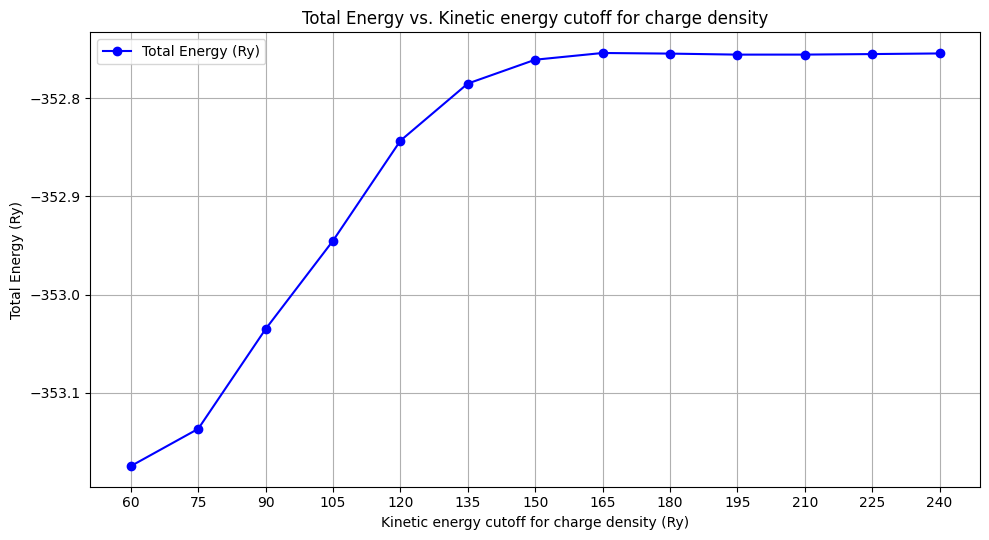

In [7]:
ecutrho = etot_ecutrho_df["ecutrho"]
total_energy = etot_ecutrho_df["etot"]

plt.figure(figsize=(10, 5.5))
plt.plot(ecutrho, total_energy, marker='o', linestyle='-', color='b', label='Total Energy (Ry)')
plt.xticks(ecutrho)
plt.title('Total Energy vs. Kinetic energy cutoff for charge density')
plt.xlabel('Kinetic energy cutoff for charge density (Ry)')
plt.ylabel('Total Energy (Ry)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("etot_ecutrho.png", dpi=600)
plt.show()

In [8]:
plt.rcParams["figure.dpi"]=150
plt.rcParams["figure.facecolor"]="white"
plt.rcParams["figure.figsize"]=(8, 6)

In [9]:
datau_file = 'bands_ppu.dat.gnu'
datad_file = 'bands_ppd.dat.gnu'
bands_ppu_file = 'bands_ppu.out'

In [10]:
datau = np.loadtxt(datau_file)
datad = np.loadtxt(datad_file)

In [11]:
def symmetry_points(file_name): 
    f = open(file_name,'r')
    x = []
    for i in f:
        if "high-symmetry" in i:
            x.append(float(i.split()[-1]))
    f.close()
    return x

In [16]:
fermi_energy = 11.8588
high_symmetry_points_lst = symmetry_points(bands_ppu_file)                     # from bands_pp.out file
high_symmetry_pointlbl_lst = ["$\Gamma$", "X", "U", "$\Gamma$", "L", "W", "X", "X'", "U'", "$\Gamma$", "L'", "W'", "X'"]      
print(len(high_symmetry_points_lst), len(high_symmetry_pointlbl_lst))    
print(high_symmetry_points_lst) 

14 13
[0.0, 0.7071, 0.9571, 1.7071, 2.3195, 2.8195, 3.173, 3.8801, 4.5872, 4.8372, 5.5872, 6.1996, 6.6996, 7.0532]


In [17]:
k = np.unique(datau[:, 0])
bandsu = np.reshape(datau[:, 1], (-1, len(k)))
bandsd = np.reshape(datad[:, 1], (-1, len(k)))

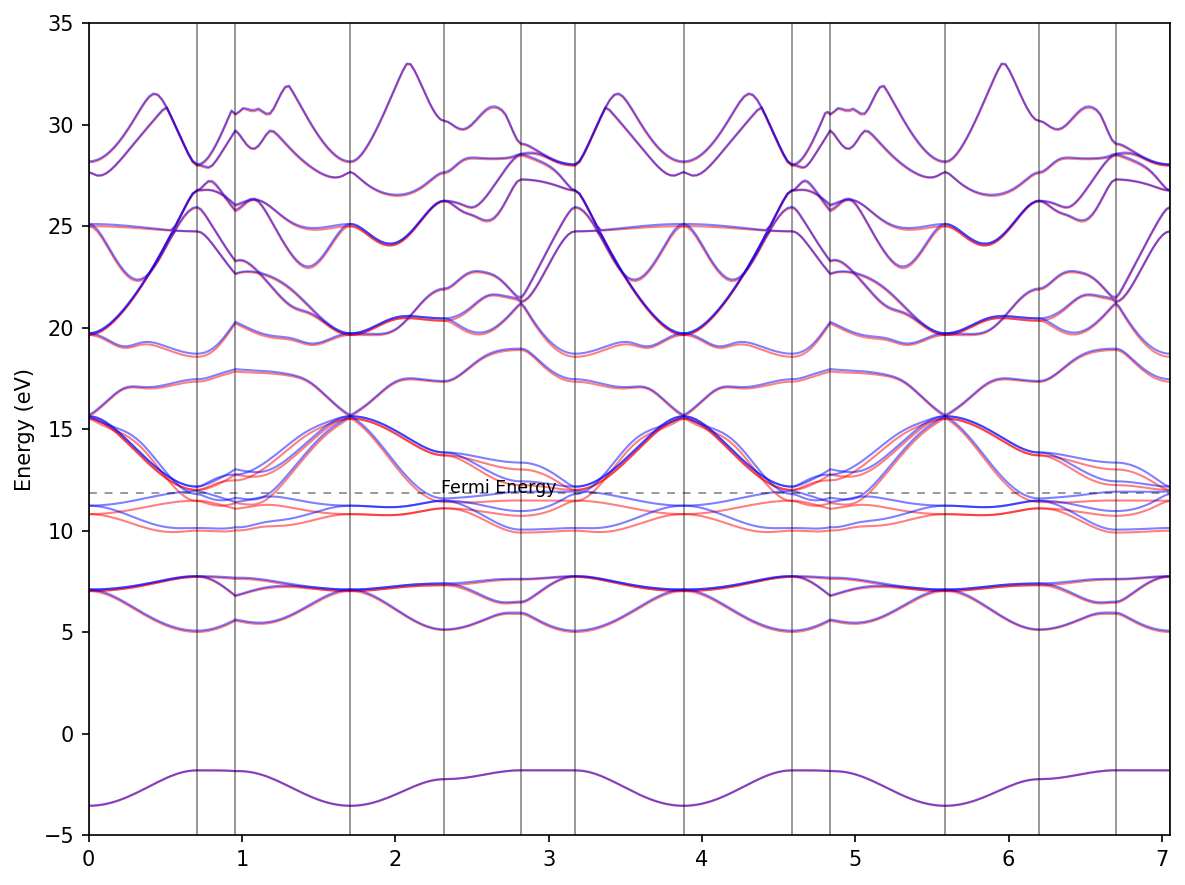

In [18]:
plt.figure()
for band in range(len(bandsu)):
    plt.plot(k, bandsu[band, :], linewidth=1, alpha=0.5, color='red')
for band in range(len(bandsd)):
    plt.plot(k, bandsd[band, :], linewidth=1, alpha=0.5, color='blue')
plt.xlim(min(k), max(k))

plt.axhline(fermi_energy, linestyle=(0, (5, 5)), linewidth=0.75, color='k', alpha=0.5)  # Fermi energy

for high_symmetry_point in high_symmetry_points_lst:
    plt.axvline(high_symmetry_point, linewidth=0.75, color='k', alpha=0.5)

# plt.xticks(ticks=high_symmetry_points_lst, labels=high_symmetry_pointlbl_lst)
# plt.xticks([])
plt.ylim(-5, 35)
plt.ylabel("Energy (eV)")
plt.text(2.3, fermi_energy, 'Fermi Energy', fontsize="small")
plt.tight_layout()
plt.show()